# Importation des librairies necessaires à la connexion de SQL Server

In [4]:
pip install jupyter_contrib_nbextensions

  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465828 sha256=3f4fd4f214721a5c87a5b26b99ea67baed7311d919c3f7b74b860979e54ca01b
  Stored in directory: c:\users\mhaegeman\appdata\local\pip\cache\wheels\e3\3a\b3\a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963398 sha256=108b7dd57d27ccedad6af35ce4ca3c86792bb25a42b762c4789cf2c6382f327d
  Stored in directory: c:\users\mhaegeman\appdata\local\pip\cache\wheels\4d\ba\f4\b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515
Successfully built jupyter-nbextensions-configurator jupyter-latex-envs
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pyodbc
import numpy as np
import matplotlib.pyplot as plt


# Instructions de connexion au serveul SRVDATAWH2

In [2]:
class SQL :
    def __init__(self):
        self = self
        
    def pd_query(self, query):
        self.q = query
        conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                                   "Server=SRVDATAWH2;"
                                   "Database=bcqdbmkge;"
                                   "UID=Sregolle;"
                                   "PWD=Ellogers;"
                                   "Trusted_Connection=No;")
        cursor = conn.cursor()
        df = pd.read_sql_query(self.q,conn)
        conn.close()
        return(df)

In [3]:
max = SQL()

In [5]:
df = max.pd_query("SELECT * FROM MH_etude_par_age")

In [6]:
df

,TK_CLI,RF,NumSeq,DatDerCde,Age
0,167,0,999.0,2011-09-01,65
1,917,0,999.0,2008-06-11,0
2,1019,0,999.0,2010-07-28,72
3,1151,0,999.0,2015-11-12,66
4,1383,0,999.0,2006-12-29,94
...,...,...,...,...,...
4095068,5545412,0,NaN,NaT,0
4095069,5545478,0,NaN,NaT,47
4095070,199411,0,460.0,2018-08-27,95
4095071,387259,6,417.0,2021-03-19,57


In [13]:
df_age = max.pd_query("select Age, count(distinct TK_CLI) as Effectif from MH_etude_par_age where DatDerCde> (GETDATE()-(5*365)) group by age order by age asc")

In [49]:
age = pd.DataFrame(df_age.values, columns=("Age",'Effectif'))
age

,Age,Effectif
0,0,409939
1,5,1
2,18,481
3,19,3056
4,20,3125
...,...,...
99,116,2
100,117,3
101,119,3
102,120,46


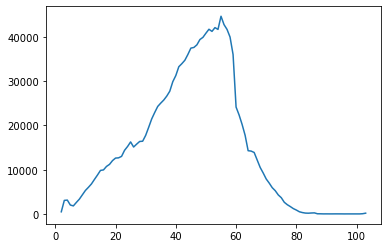

In [53]:
plt.figure()
plt.plot(age["Effectif"][2:])
plt.show()